### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/coupons.csv')

In [ ]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [ ]:
#check the columns description
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

In [49]:


#1. check if there is any user who has coupon filed as empty or null
empty_coupon_mask = data['coupon'].isnull() | data['coupon'].eq('')
any_empty_coupons = empty_coupon_mask.any()

if any_empty_coupons:
    print("There are empty coupon fields in the DataFrame.")
else:
    print("There are no empty coupon fields in the DataFrame.")


#2 Check if there is inconsistency in the data. One way is to check if anyone
#below 21 went to bar.

filtered_data = data[(data['age'] == "below 21") & (data['Bar'] != "never")]
print("\n", filtered_data)

#3 check if any of the columns have NaN / null values?
#and print only columns that have Null/NaN values
missing_cols = data.columns[data.isna().any()].tolist()
print(missing_cols)



There are no empty coupon fields in the DataFrame.

 Empty DataFrame
Columns: [destination, passanger, weather, temperature, time, coupon, expiration, gender, age, maritalStatus, has_children, education, occupation, income, car, Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50, toCoupon_GEQ5min, toCoupon_GEQ15min, toCoupon_GEQ25min, direction_same, direction_opp, Y]
Index: []

[0 rows x 26 columns]
[]


3. Decide what to do about your missing data -- drop, replace, other...

In [46]:
#filling NaN values with zeros
data[missing_cols] = data[missing_cols].fillna(0)


[]


4. What proportion of the total observations chose to accept the coupon?



In [50]:
num_acceptances = ''
total_observations = ''
acceptance_proportion = ''

#1. Count the number of acceptances (Y = 1)
num_acceptances = data['Y'][data['Y'] == 1].count()
print("\n Number of Acceptances", num_acceptances)

#2. Count the total number of observations
total_observations = data['Y'].count()
print("\n Total Observations", total_observations)

#3. Calculate the proportion
acceptance_proportion = num_acceptances / total_observations

#Print the result
print(f"\n Proportion of users who accepted the coupon: {acceptance_proportion:.2f}")


 Number of Acceptances 7210

 Total Observations 12684

 Proportion of users who accepted the coupon: 0.57


5. Use a bar plot to visualize the `coupon` column.

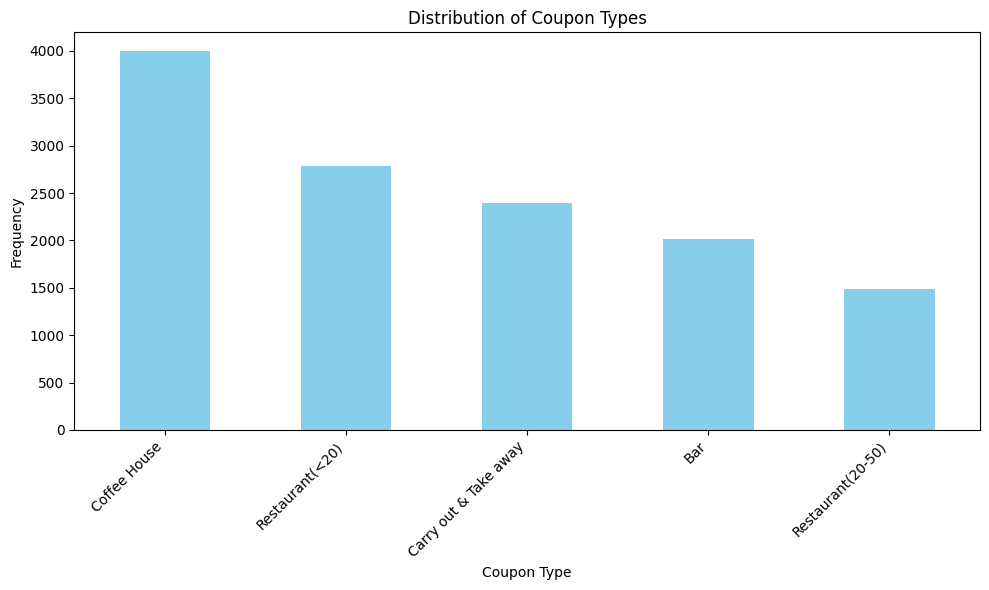

In [51]:
coupon_counts = ''

#Calculate the frequency of each coupon type
coupon_counts = data['coupon'].value_counts()

# Create the bar plot
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
coupon_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Coupon Types')
plt.xlabel('Coupon Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

6. Use a histogram to visualize the temperature column.

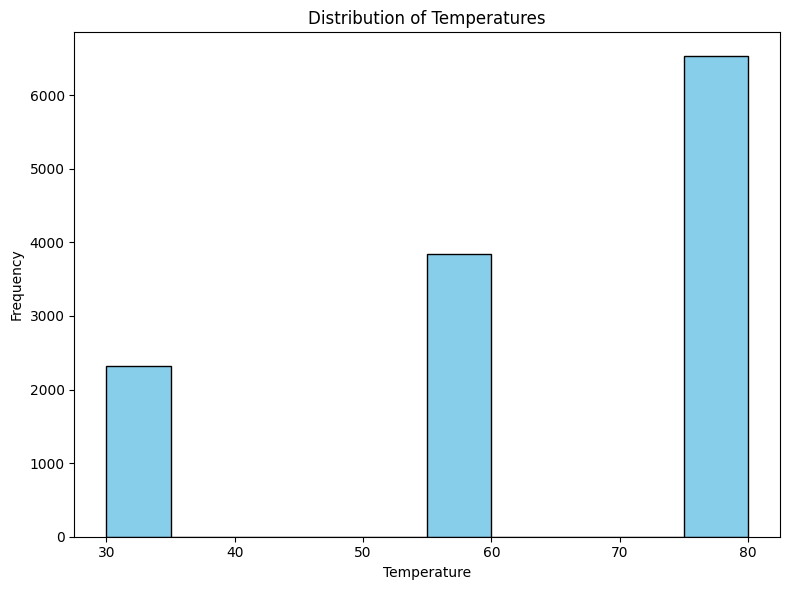

In [ ]:
# Create the histogram
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.hist(data['temperature'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Temperatures')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [34]:
bar_df = data[data['coupon'] == 'Bar']
print("Total number of rows that contains bar coupons:", bar_df.shape[0])

Total number of rows that contains bar coupons: 2017


2. What proportion of bar coupons were accepted?


In [52]:
accepted_bar_coupons = ''
num_accepted_bar_coupons = ''
total_bar_coupons = ''
proportion_accepted = ''

# 1. Filter for bar coupons and acceptance (Y = 1)
accepted_bar_coupons = bar_df[bar_df['Y'] == 1]

# 2. Calculate the number of accepted bar coupons
num_accepted_bar_coupons = len(accepted_bar_coupons)

# 3. Calculate the total number of bar coupons
total_bar_coupons = len(bar_df)

# 4. Calculate the proportion
proportion_accepted = num_accepted_bar_coupons / total_bar_coupons

# 5. Print the result
print(f"Proportion of bar coupons accepted: {proportion_accepted:.2f}")


Proportion of bar coupons accepted: 0.41


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [53]:
bar_counts = ''
less_frequent = ''
more_frequent = ''
acceptance_rate_less_frequent = ''
acceptance_rate_more_frequent = ''

# 1. Create groups based on bar visit frequency
# First check the count of different types of values for in Bar column
bar_counts = bar_df['Bar'].value_counts()
print(bar_counts)

less_frequent = bar_df[bar_df['Bar'].isin(['less1', '1~3'])]
more_frequent = bar_df[bar_df['Bar'].isin(['4~8', 'gt8'])]

# 2. Calculate acceptance rates for each group
acceptance_rate_less_frequent = less_frequent['Y'].mean()
acceptance_rate_more_frequent = more_frequent['Y'].mean()

# 3. Print the results
print(f"Acceptance rate for those who go to a bar 3 or fewer times a month: {acceptance_rate_less_frequent:.2f}")
print(f"Acceptance rate for those who go to a bar more than 3 times a month: {acceptance_rate_more_frequent:.2f}")

Bar
never    830
less1    570
1~3      397
4~8      150
gt8       49
Name: count, dtype: int64
Acceptance rate for those who go to a bar 3 or fewer times a month: 0.53
Acceptance rate for those who go to a bar more than 3 times a month: 0.77


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [54]:
target_group = ''
other_group = ''
acceptance_rate_target = ''
acceptance_rate_other = ''

# 1. Create groups based on criteria
target_group = bar_df[(bar_df['Bar'].isin(['1~3', '4~8', 'gt8'])) & (bar_df['age'].isin(['26', '31', '36', '41', '46', '50plus']))]
other_group = bar_df[~((bar_df['Bar'].isin(['1~3', '4~8', 'gt8'])) & (bar_df['age'].isin(['26', '31', '36', '41', '46', '50plus'])))]

# 2. Calculate acceptance rates for each group
acceptance_rate_target = target_group['Y'].mean()
acceptance_rate_other = other_group['Y'].mean()

# 3. Print the results
print(f"Acceptance rate for target group (go to bar > once a month and over 25): {acceptance_rate_target:.2f}")
print(f"Acceptance rate for all others: {acceptance_rate_other:.2f}")

# 4. Check for difference
print(f"\nIs there a difference? {acceptance_rate_target != acceptance_rate_other}")

Acceptance rate for target group (go to bar > once a month and over 25): 0.70
Acceptance rate for all others: 0.34

Is there a difference? True


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [55]:
target_group = ''
other_group = ''
acceptance_rate_target = ''
acceptance_rate_other = ''

# 1. Create groups based on criteria
target_group = bar_df[
    (bar_df['Bar'].isin(['1~3', '4~8', 'gt8'])) &
    (bar_df['passanger'] != 'Kid') &
    (~bar_df['occupation'].isin(['Farming', 'Fishing', 'Forestry']))
]
other_group = bar_df[
    ~((bar_df['Bar'].isin(['1~3', '4~8', 'gt8'])) &
      (bar_df['passanger'] != 'Kid') &
      (~bar_df['occupation'].isin(['Farming', 'Fishing', 'Forestry'])))
]

# 2. Calculate acceptance rates for each group
acceptance_rate_target = target_group['Y'].mean()
acceptance_rate_other = other_group['Y'].mean()

# 3. Print the results
print(f"Acceptance rate for target group: {acceptance_rate_target:.2f}")
print(f"Acceptance rate for all others: {acceptance_rate_other:.2f}")

# 4. Check for difference
print(f"\nIs there a difference? {acceptance_rate_target != acceptance_rate_other}")

Acceptance rate for target group: 0.69
Acceptance rate for all others: 0.29

Is there a difference? True


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [56]:
group1 = ''
group2 = ''
group3 = ''
target_group = ''
other_group = ''
acceptance_rate_target = ''
acceptance_rate_other = ''

# 1. Create groups based on criteria
group1 = bar_df[
    (bar_df['Bar'].isin(['1~3', '4~8', 'gt8'])) &
    (bar_df['passanger'] != 'Kid') &
    (bar_df['maritalStatus'] != 'Widowed')
]
group2 = bar_df[
    (bar_df['Bar'].isin(['1~3', '4~8', 'gt8'])) &
    (bar_df['age'].isin(['below21', '21']))
]
group3 = data[  # Use the original 'data' DataFrame for this group
    (data['coupon'] == 'Restaurant(<20)') &
    (data['RestaurantLessThan20'].isin(['4~8', 'gt8'])) &
    (data['income'].isin(['$12500 - $24999', '$25000 - $37499', '$37500 - $49999']))
]

# 2. Combine the three groups
target_group = pd.concat([group1, group2, group3], ignore_index=True)

# 3. Get the other group (all drivers not in the target group)
other_group = data[~data.index.isin(target_group.index)]

# 4. Calculate acceptance rates
acceptance_rate_target = target_group['Y'].mean()
acceptance_rate_other = other_group['Y'].mean()

# 5. Print the results
print(f"Acceptance rate for target group: {acceptance_rate_target:.2f}")
print(f"Acceptance rate for all others: {acceptance_rate_other:.2f}")

# 6. Check for difference
print(f"\nIs there a difference? {acceptance_rate_target != acceptance_rate_other}")

Acceptance rate for target group: 0.69
Acceptance rate for all others: 0.57

Is there a difference? True


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Hypothesis:

Drivers who are more likely to accept bar coupons tend to have the following characteristics:

Frequent Bar-Goers: Drivers who visit bars more than once a month demonstrate a higher likelihood of accepting bar coupons. This suggests that these individuals already have an established interest in going to bars and are therefore more receptive to offers related to bars.

Social and Outgoing: Drivers who are not accompanied by children and are not widowed may be more inclined to accept bar coupons. This could indicate a preference for socializing and enjoying bar settings in the company of adults, potentially friends or partners.

Younger Demographic: Drivers under the age of 30 might be more prone to accept bar coupons, suggesting a higher affinity for bar-related activities among younger individuals.

Lower Income and Cheap Restaurant Preference: Drivers who frequent inexpensive restaurants more than four times a month and have a lower income (less than $50K) may also be more likely to accept bar coupons. This could indicate a preference for budget-friendly options and a potential overlap in the type of establishments they visit (bars and inexpensive restaurants).

In essence, the observations suggest that drivers who are regular bar-goers, social, younger, or budget-conscious are more inclined to accept bar coupons. This aligns with the idea that these coupons are more appealing to individuals who already enjoy bar settings or are seeking affordable entertainment options.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

We'll follow a similar approach to the bar coupon analysis, focusing on:

Overall Acceptance Rate: Calculate the proportion of "Carry out & Take away" coupons that were accepted.
Frequency of Carry Out/Take Away: Compare acceptance rates between those who buy carry out/take away food frequently (e.g., more than once a month) and those who do so less often.
Destination and Passenger: Investigate if the destination (home, work, no urgent place) or the passenger type (alone, partner, kid(s), friend(s)) influences acceptance.
Time of Day and Weather: Explore potential relationships between coupon acceptance and the time of day or weather conditions.
Income and Occupation: Analyze if income levels or occupation types play a role in acceptance rates.


In [58]:
#What proportion of Carry Out and take away coupons were accepted?
accepted_carry_coupons = ''
num_accepted_carry_coupons = ''
total_carry_coupons = ''
proportion_accepted = ''

#Create a new DataFrame that contains just the Carry Out and take away coupons.

carry_df = data[data['coupon'] == 'Carry out & Take away']
print("Total number of rows that contains Carry out coupons:", len(carry_df))


# 1. Filter for bar coupons and acceptance (Y = 1)
accepted_carry_coupons = carry_df[carry_df['Y'] == 1]

# 2. Calculate the number of accepted bar coupons
num_accepted_carry_coupons = len(accepted_carry_coupons)

# 3. Calculate the total number of bar coupons
total_carry_coupons = len(carry_df)

# 4. Calculate the proportion
proportion_accepted = num_accepted_carry_coupons / total_carry_coupons

# 5. Print the result
print(f"Proportion of bar coupons accepted: {proportion_accepted:.2f}")



Total number of rows that contains Carry out coupons: 2393
Proportion of bar coupons accepted: 0.74


In [67]:
#. Compare acceptance rates based on carry out/take away frequency
frequent_carry_out = carry_df[carry_df['CarryAway'].isin(['1~3', '4~8', 'gt8'])]

less_frequent_carry_out = carry_df[~carry_df['CarryAway'].isin(['1~3', '4~8', 'gt8'])]

acceptance_rate_frequent = frequent_carry_out['Y'].mean()
acceptance_rate_less_frequent = less_frequent_carry_out['Y'].mean()

# 3. Print the results
print(f"Acceptance rate for those who carry away 3 or fewer times a month: {acceptance_rate_less_frequent:.2f}")
print(f"Acceptance rate for those who carry away more than 3 times a month: {acceptance_rate_frequent:.2f}")


Acceptance rate for those who carry away 3 or fewer times a month: 0.70
Acceptance rate for those who carry away more than 3 times a month: 0.74


       destination  passanger         Y
0             Home      Alone  0.809859
1             Home     Kid(s)  0.333333
2             Home    Partner  0.770492
3  No Urgent Place      Alone  0.840000
4  No Urgent Place  Friend(s)  0.757781
5  No Urgent Place     Kid(s)  0.773438
6  No Urgent Place    Partner  0.666667
7             Work      Alone  0.654856


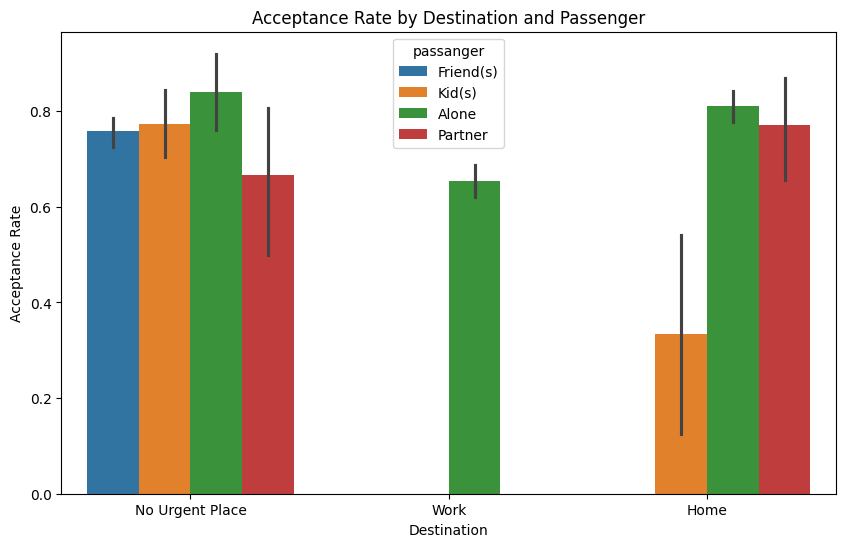

In [68]:
# Investigate if the destination (home, work, no urgent place) or the passenger
#type (alone, partner, kid(s), friend(s)) influences acceptance.

# 1. Group by destination and passenger, then calculate acceptance rates
destination_passenger_acceptance = carry_df.groupby(['destination', 'passanger'])['Y'].mean().reset_index()

# 2. Print the results
print(destination_passenger_acceptance)

# 3. (Optional) Visualize the results using a bar plot or heatmap

plt.figure(figsize=(10, 6))
sns.barplot(x='destination', y='Y', hue='passanger', data=carry_df)
plt.title('Acceptance Rate by Destination and Passenger')
plt.xlabel('Destination')
plt.ylabel('Acceptance Rate')
plt.show()


    time weather         Y
0   10AM   Rainy  0.675676
1   10AM   Snowy  0.735632
2   10AM   Sunny  0.697201
3   10PM   Rainy  0.500000
4   10PM   Snowy  0.744000
5   10PM   Sunny  0.768072
6    2PM   Rainy  0.756757
7    2PM   Sunny  0.889503
8    6PM   Rainy  0.805970
9    6PM   Sunny  0.828804
10   7AM   Rainy  0.494253
11   7AM   Snowy  0.631579
12   7AM   Sunny  0.716024


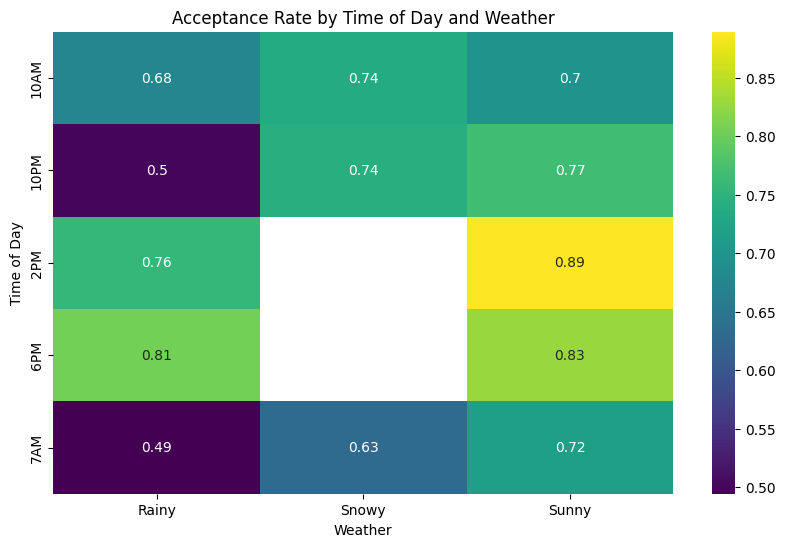

In [71]:
# 1. Group by time and weather, then calculate acceptance rates
time_weather_acceptance = carry_df.groupby(['time', 'weather'])['Y'].mean().reset_index()

# 2. Print the results
print(time_weather_acceptance)

# 3. Visualize the results using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(time_weather_acceptance.pivot(index='time', columns='weather', values='Y'), annot=True, cmap='viridis')
plt.title('Acceptance Rate by Time of Day and Weather')
plt.xlabel('Weather')
plt.ylabel('Time of Day')
plt.show()

Acceptance Rate by Income Level:
             income         Y
0   $100000 or More  0.705882
1   $12500 - $24999  0.752907
2   $25000 - $37499  0.774869
3   $37500 - $49999  0.712610
4   $50000 - $62499  0.772109
5   $62500 - $74999  0.726115
6   $75000 - $87499  0.656805
7   $87500 - $99999  0.719298
8  Less than $12500  0.750000


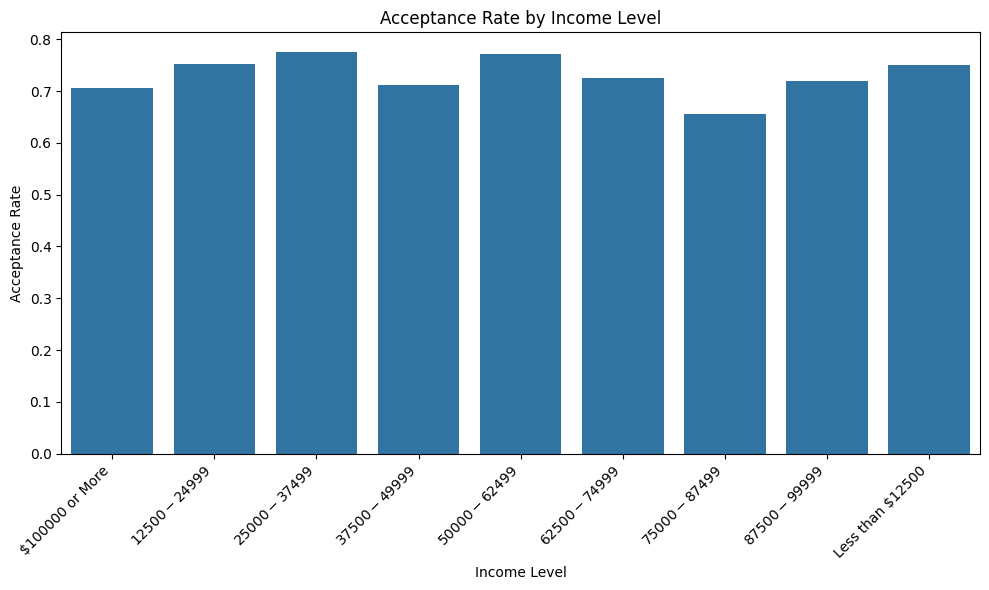


Acceptance Rate by Occupation:
                                   occupation         Y
0                  Architecture & Engineering  0.633333
1    Arts Design Entertainment Sports & Media  0.634783
2   Building & Grounds Cleaning & Maintenance  1.000000
3                        Business & Financial  0.817308
4                 Community & Social Services  0.723404
5                     Computer & Mathematical  0.717054
6                   Construction & Extraction  0.964286
7                  Education&Training&Library  0.716667
8                  Farming Fishing & Forestry  0.800000
9          Food Preparation & Serving Related  0.825397
10       Healthcare Practitioners & Technical  0.888889
11                         Healthcare Support  0.833333
12          Installation Maintenance & Repair  0.625000
13                                      Legal  0.536585
14               Life Physical Social Science  0.500000
15                                 Management  0.787671
16            Of

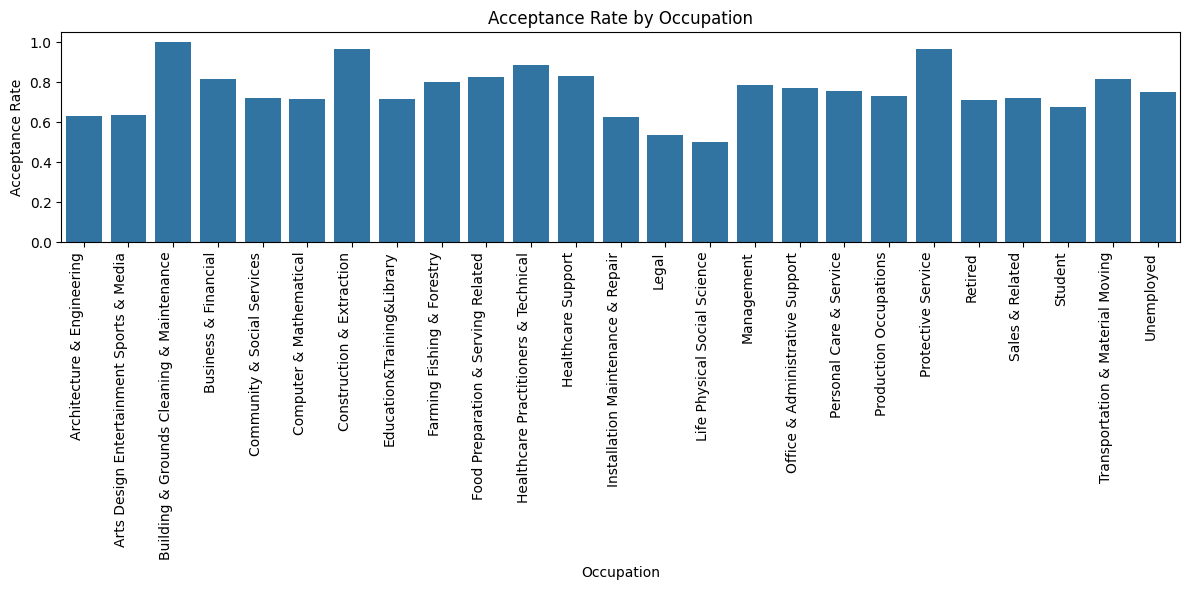

In [72]:
 #Income and Occupation: Analyze if income levels or occupation types play a role in
 #acceptance rates.

income_acceptance = ''
occupation_acceptance = ''

# 1. Group by income and occupation, then calculate acceptance rates
# 1. Analyze acceptance rates by income level
income_acceptance = carry_df.groupby('income')['Y'].mean().reset_index()
print("Acceptance Rate by Income Level:")
print(income_acceptance)

plt.figure(figsize=(10, 6))
sns.barplot(x='income', y='Y', data=income_acceptance)
plt.title('Acceptance Rate by Income Level')
plt.xlabel('Income Level')
plt.ylabel('Acceptance Rate')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# 2. Analyze acceptance rates by occupation
occupation_acceptance = carry_df.groupby('occupation')['Y'].mean().reset_index()
print("\nAcceptance Rate by Occupation:")
print(occupation_acceptance)

plt.figure(figsize=(12, 6))
sns.barplot(x='occupation', y='Y', data=occupation_acceptance)
plt.title('Acceptance Rate by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Acceptance Rate')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

Hypothesis:
Drivers who are more likely to accept "Carry out & Take away" coupons tend to exhibit the following characteristics:

Frequent Carry Out/Take Away Users: Drivers who purchase carry out or take away food more frequently (e.g., more than once a month) are more inclined to accept these coupons. This suggests an established preference for this type of dining and a higher likelihood of utilizing such offers.

Convenience-Oriented: Drivers heading home or with no urgent destination might be more receptive to "Carry out & Take away" coupons, as they have more flexibility to make a detour for food pickup without significantly disrupting their plans.

Social or Shared Meals: Drivers with partners or friends as passengers could show higher acceptance rates, indicating a preference for sharing carry out/take away meals with others, potentially making the coupon more valuable.

Time-Sensitive and Weather-Dependent: Acceptance rates might be influenced by the time of day, with higher acceptance during typical meal times (lunch, dinner), and by weather conditions, potentially increasing during inclement weather when people are less inclined to cook or dine out.

